## STATISTICAL TESTS

The formal idea of a p-value is nuanced.  How rare would our sample be, if drawn at random from a population?  

The null hypothesis, that chance explains the difference, is either: 

* correctly embraced
* incorrently embraced (type 1 error, false positive)
* correctly rejected, or 
* incorrectly rejected (type 2 error, false negative)

One may accept that some alternative hypothesis is the case, based on a low enough probability that the null hypothesis explains the data.  

If the probability or p-value remains higher than the threshold cut-off (the critical value), that doesn't mean the null hypothesis is therefore true, or that it's true with a certain probability.  

All we know is there's insufficient evidence to dismiss it.

Judging an hypothesis to be more or less probable, given the data, is more what a Bayesian line of thinking would head towards.  The Frequentist turns it around:  given the null hypothesis, how likely is this data?  If the value is low enough, the null hypothesis must be false.



In [10]:
import scipy.stats as stats
import pandas as pd

sample = pd.Series(stats.norm(loc=3.0, scale=1.4).rvs(100))
sample.head()  # play with this, check tail?  Practice slicing?

0    4.027051
1    2.540304
2    4.608112
3    2.486566
4    5.658187
dtype: float64

In [5]:
sample.iloc[155:160] # up to but no including

155    1.921761
156    3.307310
157    3.229010
158    1.857193
159    3.154358
dtype: float64

In [3]:
sample.describe()

count    1000.000000
mean        2.994449
std         1.336674
min        -0.613772
25%         2.140535
50%         2.939220
75%         3.827405
max         7.974718
dtype: float64

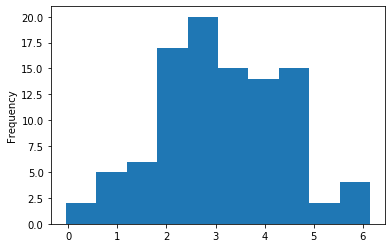

In [12]:
%matplotlib inline
sample.plot(kind="hist", bins=10);

## T-Test

The form of play here is to practice generating data samples, including some that shouldn't register as different, and seeing if they do.

People who run the same T-Test over and over, until they get p < 0.05, may be falling into a pitfall, in not continuing those tests.  See what results you get here.

Beyond the T-test: ANOVA, Tukey, with Chi-Squared in there somewhere.

What we're looking for in all these cases is whether we really looking at a difference that makes a difference.  Are these two sets of data worth distinguishing?  What if we have more than two sets?

ANOVO is good at detecting the presence of outliers, without saying who they are.  Tukey is good at comparing the sets pairwise and deciding which pairs might have an above threshold difference, meaning a low probability of differing by chance.

In [13]:
from scipy.stats import ttest_ind
import numpy as np

In [14]:
before = np.random.normal(2.1, 0.9, 1000)
after  = np.random.normal(2.1, 0.7, 1000)

results = ttest_ind(before, after)

Like try the same $\mu$ for both, and just mess with the $\sigma$, by making the curve sharper.  Try plotting both.

Remember, a lot of these tests are pretty worthless if we can't assume a normal distrubution on the part of what our samples sample.  

The height of the barley plant needs to taper off symmetrically on both sides of some mean, with no equally salient peak somewhere else.

In [15]:
results

Ttest_indResult(statistic=-0.19628238385671737, pvalue=0.8444091101860818)

## F-Test

In [ ]:
from statistics import variance
import scipy

sampleA = np.random.normal(1000, 100, 15)
sampleB = np.random.normal(1000, 110, 20)

F = variance(sampleA) / variance(sampleB)
df1 = len(sampleA) - 1
df2 = len(sampleB) - 1
survival = scipy.stats.f.sf(F, df1, df2)
pvalue   = scipy.stats.f.cdf(F, df1, df2)

In [ ]:
survival

In [ ]:
pvalue

In [ ]:
alpha = 0.05
if pvalue < alpha:
    print("Reject the Null Hypothesis H0")
else:
    print("Fail to reject the Null Hypothesis H0")

## ANOVA

In [ ]:
import scipy.stats as stats

sampleA = stats.norm(loc=3.0, scale=1.4).rvs(1000)
sampleB = stats.norm(loc=3.0, scale=1.4).rvs(1000)
sampleC = stats.norm(loc=3.1, scale=1.4).rvs(1000)

stats.f_oneway(sampleA, sampleB, sampleC)

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('oOuu8IBd-yo')

[Example Online Tutorial](https://towardsdatascience.com/1-way-anova-from-scratch-dissecting-the-anova-table-with-a-worked-example-170f4f2e58ad)

## ANCOVA

In [ ]:
# ? stats.norm

## Tukey

## For Further Reading

Windish, Donna M, and Marie Diener-West. [“A clinician-educator's roadmap to choosing and interpreting statistical tests.”](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1924630/) Journal of general internal medicine vol. 21,6 (2006): 656-60. doi:10.1111/j.1525-1497.2006.00390.x